In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')

In [6]:
df.reset_index(inplace=True)
df.set_index('index', inplace=True)

In [7]:
df

age     sex     bmi  children smoker     region      charges
index                                                              
0       19  female  27.900         0    yes  southwest  16884.92400
1       18    male  33.770         1     no  southeast   1725.55230
2       28    male  33.000         3     no  southeast   4449.46200
3       33    male  22.705         0     no  northwest  21984.47061
4       32    male  28.880         0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333    50    male  30.970         3     no  northwest  10600.54830
1334    18  female  31.920         0     no  northeast   2205.98080
1335    18  female  36.850         0     no  southeast   1629.83350
1336    21  female  25.800         0     no  southwest   2007.94500
1337    61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [8]:
labelencoder = LabelEncoder()

In [9]:
df['sex'] = labelencoder.fit_transform(df['sex'])

In [10]:
df

age  sex     bmi  children smoker     region      charges
index                                                           
0       19    0  27.900         0    yes  southwest  16884.92400
1       18    1  33.770         1     no  southeast   1725.55230
2       28    1  33.000         3     no  southeast   4449.46200
3       33    1  22.705         0     no  northwest  21984.47061
4       32    1  28.880         0     no  northwest   3866.85520
...    ...  ...     ...       ...    ...        ...          ...
1333    50    1  30.970         3     no  northwest  10600.54830
1334    18    0  31.920         0     no  northeast   2205.98080
1335    18    0  36.850         0     no  southeast   1629.83350
1336    21    0  25.800         0     no  southwest   2007.94500
1337    61    0  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [11]:
df['smoker'] = labelencoder.fit_transform(df['smoker'])

In [12]:
df

age  sex     bmi  children  smoker     region      charges
index                                                            
0       19    0  27.900         0       1  southwest  16884.92400
1       18    1  33.770         1       0  southeast   1725.55230
2       28    1  33.000         3       0  southeast   4449.46200
3       33    1  22.705         0       0  northwest  21984.47061
4       32    1  28.880         0       0  northwest   3866.85520
...    ...  ...     ...       ...     ...        ...          ...
1333    50    1  30.970         3       0  northwest  10600.54830
1334    18    0  31.920         0       0  northeast   2205.98080
1335    18    0  36.850         0       0  southeast   1629.83350
1336    21    0  25.800         0       0  southwest   2007.94500
1337    61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

In [13]:
df = pd.get_dummies(data=df, columns=['region'])

In [14]:
df

age  sex     bmi  children  smoker      charges  region_northeast  \
index                                                                      
0       19    0  27.900         0       1  16884.92400                 0   
1       18    1  33.770         1       0   1725.55230                 0   
2       28    1  33.000         3       0   4449.46200                 0   
3       33    1  22.705         0       0  21984.47061                 0   
4       32    1  28.880         0       0   3866.85520                 0   
...    ...  ...     ...       ...     ...          ...               ...   
1333    50    1  30.970         3       0  10600.54830                 0   
1334    18    0  31.920         0       0   2205.98080                 1   
1335    18    0  36.850         0       0   1629.83350                 0   
1336    21    0  25.800         0       0   2007.94500                 0   
1337    61    0  29.070         0       1  29141.36030                 0   

       region_northwest  region_southeast  region_southwest  
index                                                        
0                     0                 0                 1  
1                     0                 1                 0  
2                     0                 1                 0  
3                     1                 0                 0  
4                     1                 0                 0  
...                 ...               ...               ...  
1333                  1                 0                 0  
1334                  0                 0                 0  
1335                  0                 1                 0  
1336                  0                 0                 1  
1337                  1                 0                 0  

[1338 rows x 10 columns]

In [15]:
correlation_matrix = df.corr()
correlation_matrix

age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008   
sex              -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292   
bmi               0.109272  0.046371  1.000000  0.012759  0.003750  0.198341   
children          0.042469  0.017163  0.012759  1.000000  0.007673  0.067998   
smoker           -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251   
charges           0.299008  0.057292  0.198341  0.067998  0.787251  1.000000   
region_northeast  0.002475 -0.002425 -0.138156 -0.022808  0.002811  0.006349   
region_northwest -0.000407 -0.011156 -0.135996  0.024806 -0.036945 -0.039905   
region_southeast -0.011642  0.017117  0.270025 -0.023066  0.068498  0.073982   
region_southwest  0.010016 -0.004184 -0.006205  0.021914 -0.036945 -0.043210   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475         -0.000407         -0.011642   
sex                      -0.002425         -0.011156          0.017117   
bmi                      -0.138156         -0.135996          0.270025   
children                 -0.022808          0.024806         -0.023066   
smoker                    0.002811         -0.036945          0.068498   
charges                   0.006349         -0.039905          0.073982   
region_northeast          1.000000         -0.320177         -0.345561   
region_northwest         -0.320177          1.000000         -0.346265   
region_southeast         -0.345561         -0.346265          1.000000   
region_southwest         -0.320177         -0.320829         -0.346265   

                  region_southwest  
age                       0.010016  
sex                      -0.004184  
bmi                      -0.006205  
children                  0.021914  
smoker                   -0.036945  
charges                  -0.043210  
region_northeast         -0.320177  
region_northwest         -0.320829  
region_southeast         -0.346265  
region_southwest          1.000000

In [16]:
Spearman_correlation_matrix = df.corr(method='spearman')
Spearman_correlation_matrix

age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020809  0.107736  0.056992 -0.025210  0.534392   
sex              -0.020809  1.000000  0.044802  0.015589  0.076185  0.009490   
bmi               0.107736  0.044802  1.000000  0.015607  0.002203  0.119396   
children          0.056992  0.015589  0.015607  1.000000  0.016583  0.133339   
smoker           -0.025210  0.076185  0.002203  0.016583  1.000000  0.663460   
charges           0.534392  0.009490  0.119396  0.133339  0.663460  1.000000   
region_northeast -0.000149 -0.002425 -0.133115 -0.025690  0.002811  0.046109   
region_northwest  0.002683 -0.011156 -0.127168  0.034465 -0.036945 -0.021634   
region_southeast -0.015273  0.017117  0.249037 -0.019531  0.068498  0.017275   
region_southwest  0.013315 -0.004184  0.001710  0.011466 -0.036945 -0.042354   

                  region_northeast  region_northwest  region_southeast  \
age                      -0.000149          0.002683         -0.015273   
sex                      -0.002425         -0.011156          0.017117   
bmi                      -0.133115         -0.127168          0.249037   
children                 -0.025690          0.034465         -0.019531   
smoker                    0.002811         -0.036945          0.068498   
charges                   0.046109         -0.021634          0.017275   
region_northeast          1.000000         -0.320177         -0.345561   
region_northwest         -0.320177          1.000000         -0.346265   
region_southeast         -0.345561         -0.346265          1.000000   
region_southwest         -0.320177         -0.320829         -0.346265   

                  region_southwest  
age                       0.013315  
sex                      -0.004184  
bmi                       0.001710  
children                  0.011466  
smoker                   -0.036945  
charges                  -0.042354  
region_northeast         -0.320177  
region_northwest         -0.320829  
region_southeast         -0.346265  
region_southwest          1.000000

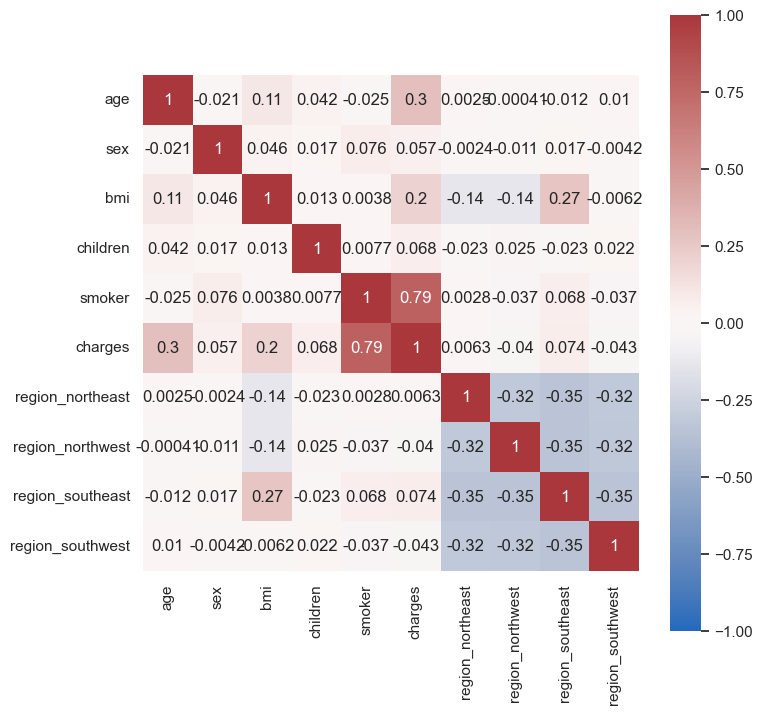

In [17]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

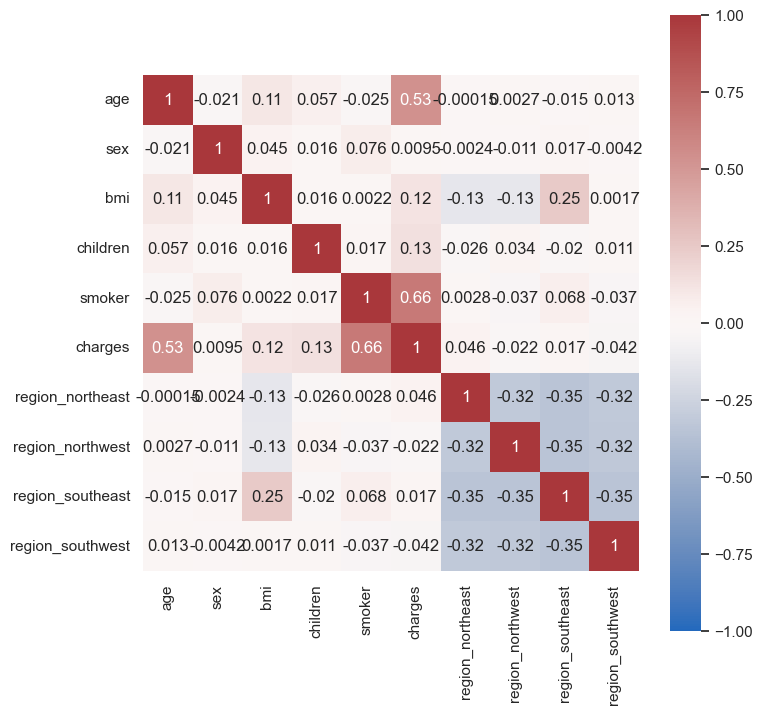

In [16]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    Spearman_correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

In [18]:
df.isnull().values.any()

False

In [20]:
bmi = pd.DataFrame(
    [
    {"BMI": "< 18.5", "Condition": "Underweight"},
    {"BMI": "18.5 - 24.9", "Condition": "Healthy weight"},
    {"BMI": "25.0 - 29.9", "Condition": "Overweight"},
    {"BMI": "35 > X > 30", "Condition": "Obesity, class 1"},
    {"BMI": "40 > X > 35", "Condition": "Obesity, class 2"},
    {"BMI": "< 40", "Condition": "Obesity, class 3"}
    ]
)
bmi

BMI         Condition
0       < 18.5       Underweight
1  18.5 - 24.9    Healthy weight
2  25.0 - 29.9        Overweight
3  35 > X > 30  Obesity, class 1
4  40 > X > 35  Obesity, class 2
5         < 40  Obesity, class 3

In [21]:
conditions = [
    (df['bmi'] >= 0) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >=35) & (df['bmi'] < 40),
    (df['bmi'] >= 40) & (df['bmi'] < 45),
    (df['bmi'] >= 45)
]

results = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity, class 1', 'Obesity, class 2', 'Obesity, class 3']

df['BMI'] = np.select(conditions, results)

In [22]:
df['BMI'].value_counts().to_frame()

BMI
Overweight        391
Healthy weight    386
Underweight       245
Obesity, class 1  225
Obesity, class 2   71
Obesity, class 3   20

In [23]:
df.head()

age  sex     bmi  children  smoker      charges  region_northeast  \
index                                                                      
0       19    0  27.900         0       1  16884.92400                 0   
1       18    1  33.770         1       0   1725.55230                 0   
2       28    1  33.000         3       0   4449.46200                 0   
3       33    1  22.705         0       0  21984.47061                 0   
4       32    1  28.880         0       0   3866.85520                 0   

       region_northwest  region_southeast  region_southwest             BMI  
index                                                                        
0                     0                 0                 1  Healthy weight  
1                     0                 1                 0      Overweight  
2                     0                 1                 0      Overweight  
3                     1                 0                 0     Underweight  
4                     1                 0                 0  Healthy weight

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(x='BMI', data=df, stat='count', shrink=0.8, palette='RdBu_r')
plt.style.use('seaborn-deep')
plt.show()

In [25]:
df['smoker'].value_counts().to_frame()

smoker
0    1064
1     274

<AxesSubplot:ylabel='Frequency'>

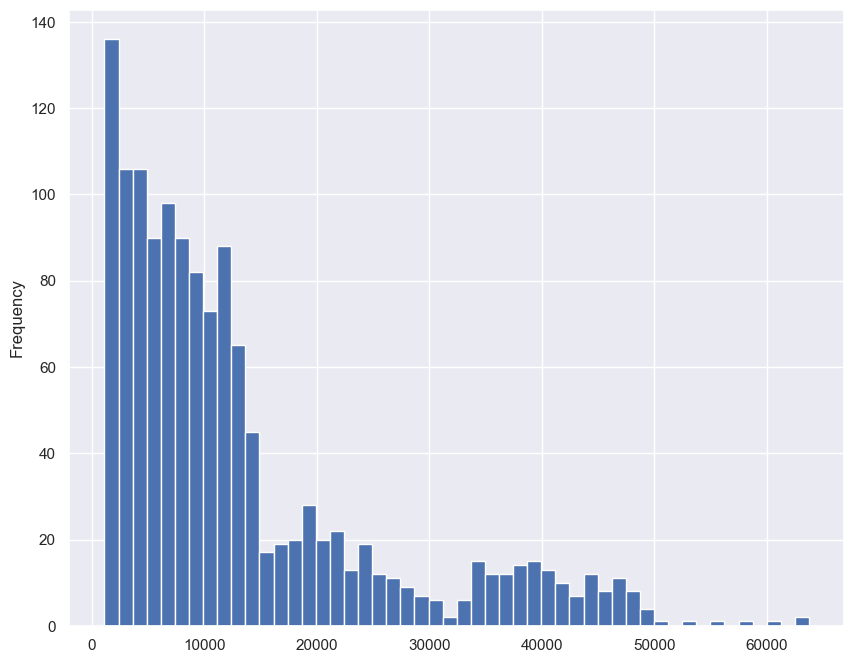

In [26]:
df['charges'].plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

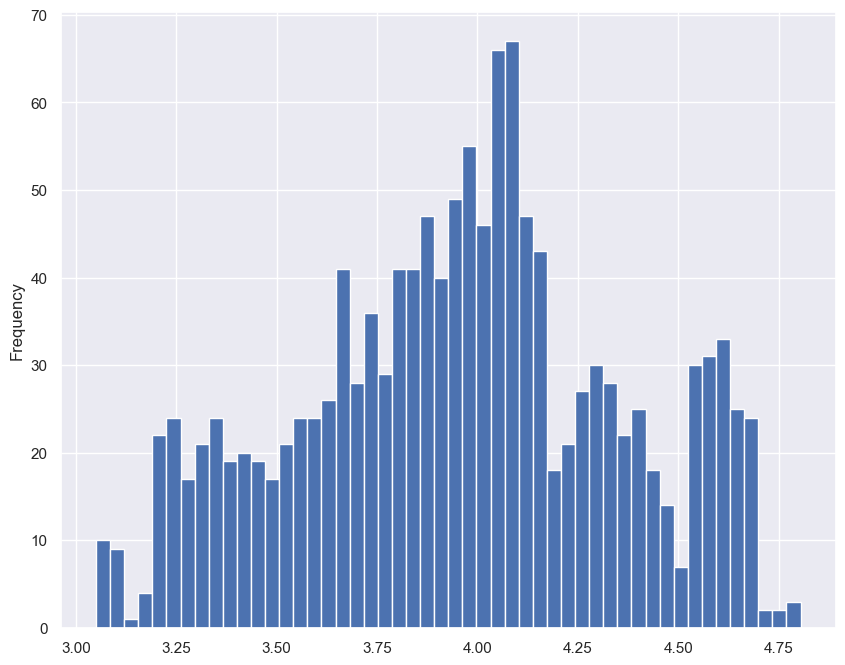

In [27]:
np.log10(df['charges']).plot(kind='hist', bins=50)

In [28]:
np.log(df['charges']).plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

In [29]:
nosmoke = df[df['smoker']==0]
smoke = df[df['smoker']==1]

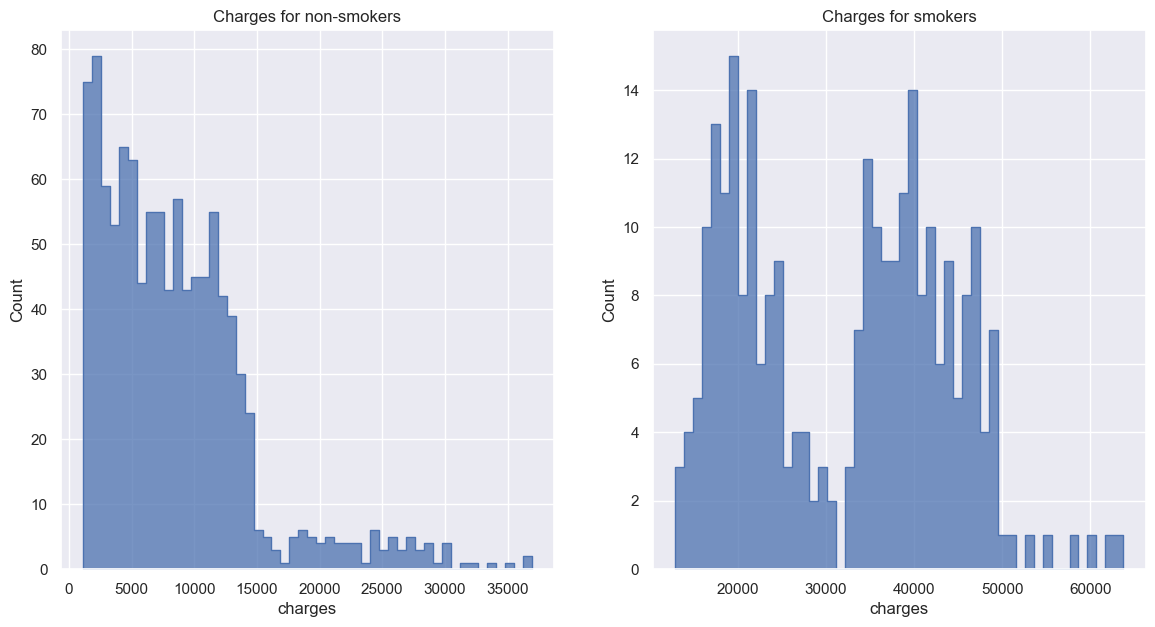

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(x='charges', data=nosmoke, ax=axes[0], bins=50, element="step")
axes[0].set_title('Charges for non-smokers')
sns.histplot(x='charges', data=smoke, ax=axes[1], bins=50, element="step")
axes[1].set_title('Charges for smokers')
plt.style.use('seaborn-deep')
plt.show()

In [31]:
df['sex'].value_counts().to_frame('Count')

Count
1    676
0    662

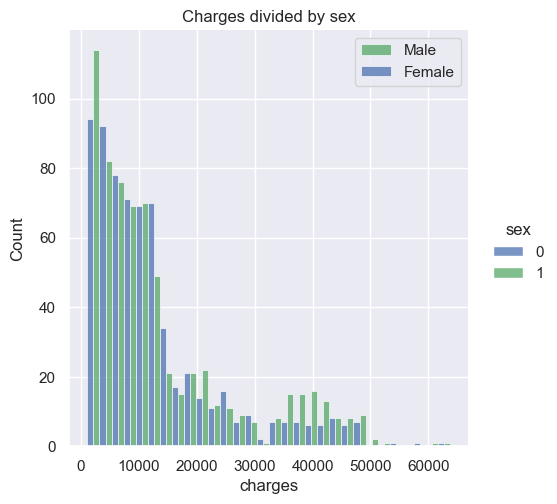

In [32]:
sns.displot(df, x='charges', hue='sex', multiple='dodge')
plt.title('Charges divided by sex')
plt.legend(['Male','Female'])

plt.show()

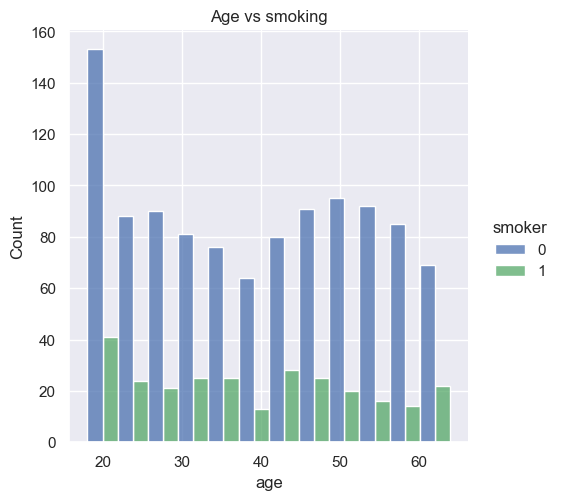

In [33]:
sns.displot(df, x='age', hue='smoker', multiple='dodge')
plt.title('Age vs smoking')

plt.show()

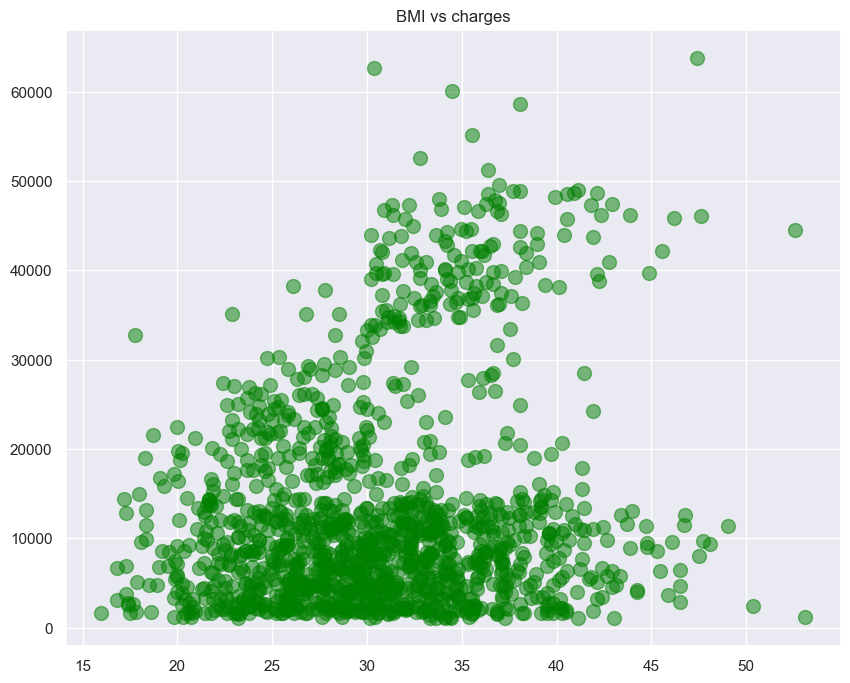

In [34]:
plt.scatter(df['bmi'], df['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

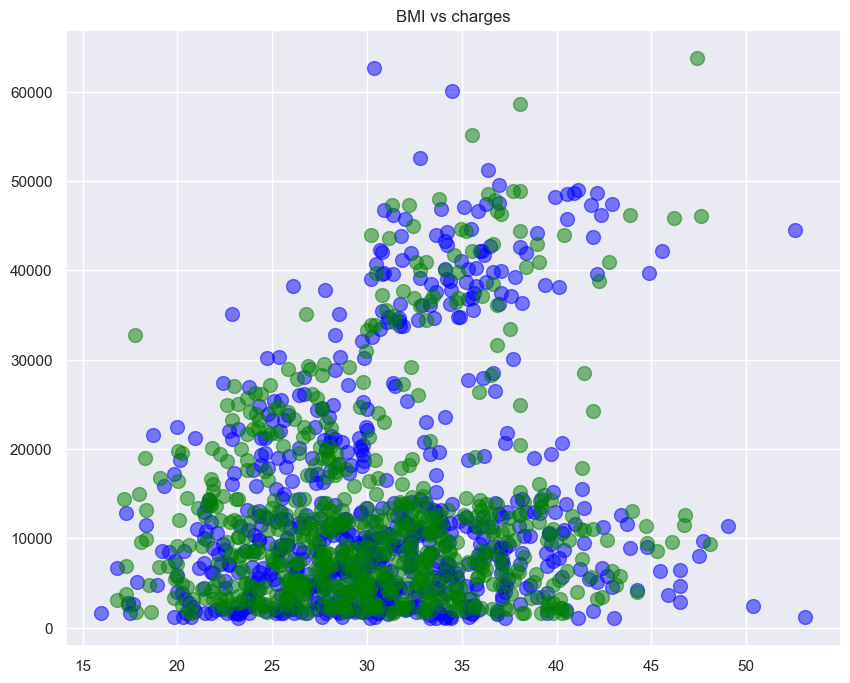

In [35]:
female = df[df['sex']==0]
male = df[df['sex']==1]
plt.scatter(male['bmi'], male['charges'],s=100, color='blue', alpha=0.5)
plt.scatter(female['bmi'], female['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

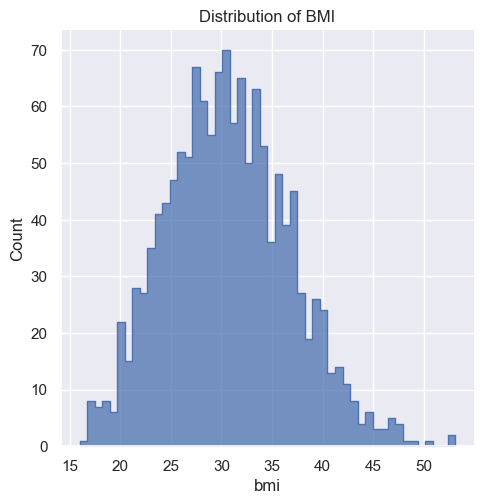

In [36]:
sns.displot(df, x='bmi',element='step', bins=50)
plt.title('Distribution of BMI')
plt.show()

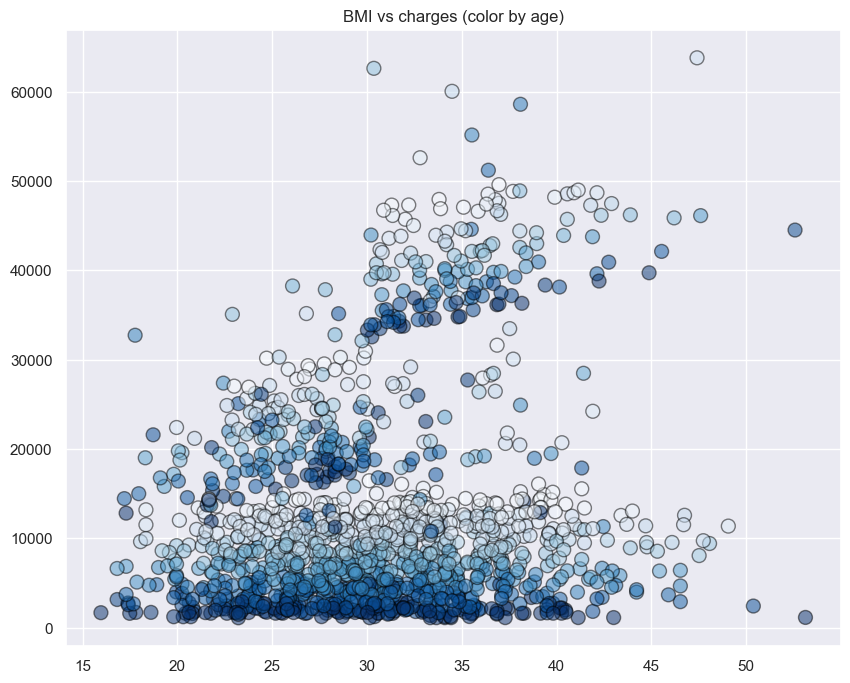

In [37]:
plt.scatter(df['bmi'], df['charges'],s=100, c=df["age"], cmap='Blues_r', alpha=0.5, edgecolors='Black')
plt.title('BMI vs charges (color by age)')
plt.show()

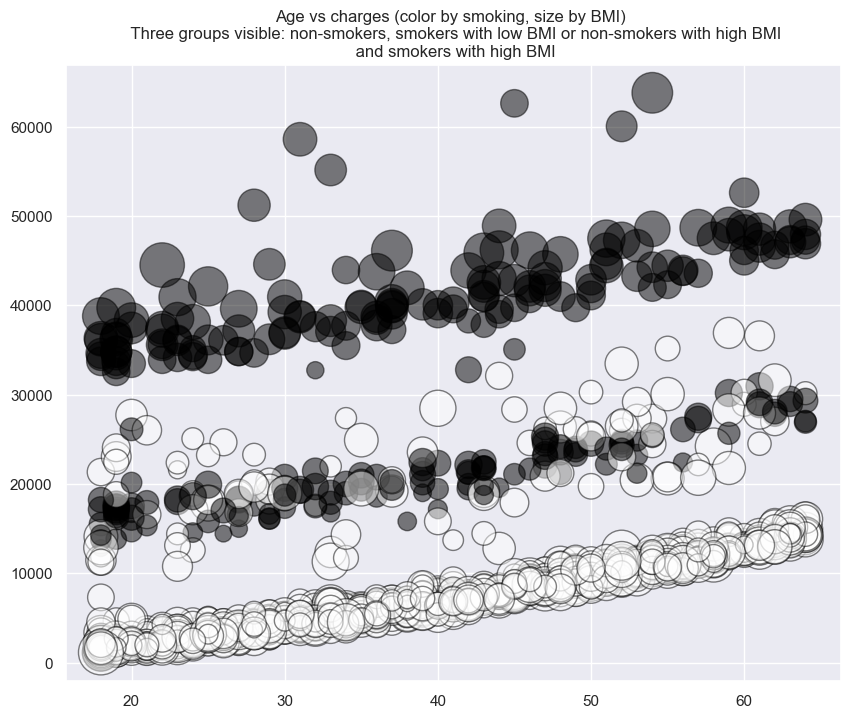

In [38]:
plt.scatter(df['age'], df['charges'], c=df['smoker'], cmap='gist_yarg', s=df["bmi"]**1.75, alpha=0.5, edgecolors='Black')
plt.title('Age vs charges (color by smoking, size by BMI) \n Three groups visible: non-smokers, \
smokers with low BMI or non-smokers with high BMI\
\n and smokers with high BMI')
plt.show()
# dodać legendę
# przenieść do plotly

***Modele*** Regresja liniowa, random forest, SVR, poszukać innych - np. regresja wielomianowa

***Miary sukcesu***
RMSE, r^2, MAE, MAPE, wizualizacja na scatter plocie

In [39]:
df.head()

age  sex     bmi  children  smoker      charges  region_northeast  \
index                                                                      
0       19    0  27.900         0       1  16884.92400                 0   
1       18    1  33.770         1       0   1725.55230                 0   
2       28    1  33.000         3       0   4449.46200                 0   
3       33    1  22.705         0       0  21984.47061                 0   
4       32    1  28.880         0       0   3866.85520                 0   

       region_northwest  region_southeast  region_southwest             BMI  
index                                                                        
0                     0                 0                 1  Healthy weight  
1                     0                 1                 0      Overweight  
2                     0                 1                 0      Overweight  
3                     1                 0                 0     Underweight  
4                     1                 0                 0  Healthy weight

In [83]:
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score


In [65]:
#Skalowanie
scaler=StandardScaler()
df[['age','bmi','children']]=scaler.fit_transform(df[['age','bmi','children']])

In [66]:
df.head()

age  sex       bmi  children  smoker      charges  \
index                                                           
0     -1.438764    0 -0.453320 -0.908614       1  16884.92400   
1     -1.509965    1  0.509621 -0.078767       0   1725.55230   
2     -0.797954    1  0.383307  1.580926       0   4449.46200   
3     -0.441948    1 -1.305531 -0.908614       0  21984.47061   
4     -0.513149    1 -0.292556 -0.908614       0   3866.85520   

       region_northeast  region_northwest  region_southeast  region_southwest  \
index                                                                           
0                     0                 0                 0                 1   
1                     0                 0                 1                 0   
2                     0                 0                 1                 0   
3                     0                 1                 0                 0   
4                     0                 1                 0                 0   

                  BMI  
index                  
0      Healthy weight  
1          Overweight  
2          Overweight  
3         Underweight  
4      Healthy weight

In [67]:
X=df.drop(["charges","BMI"],axis='columns') #charges opłaty jako y więc dropuje, BMI jest kategoryczna więc też ją muszę usunąć


In [68]:
X

age  sex       bmi  children  smoker  region_northeast  \
index                                                                
0     -1.438764    0 -0.453320 -0.908614       1                 0   
1     -1.509965    1  0.509621 -0.078767       0                 0   
2     -0.797954    1  0.383307  1.580926       0                 0   
3     -0.441948    1 -1.305531 -0.908614       0                 0   
4     -0.513149    1 -0.292556 -0.908614       0                 0   
...         ...  ...       ...       ...     ...               ...   
1333   0.768473    1  0.050297  1.580926       0                 0   
1334  -1.509965    0  0.206139 -0.908614       0                 1   
1335  -1.509965    0  1.014878 -0.908614       0                 0   
1336  -1.296362    0 -0.797813 -0.908614       0                 0   
1337   1.551686    0 -0.261388 -0.908614       1                 0   

       region_northwest  region_southeast  region_southwest  
index                                                        
0                     0                 0                 1  
1                     0                 1                 0  
2                     0                 1                 0  
3                     1                 0                 0  
4                     1                 0                 0  
...                 ...               ...               ...  
1333                  1                 0                 0  
1334                  0                 0                 0  
1335                  0                 1                 0  
1336                  0                 0                 1  
1337                  1                 0                 0  

[1338 rows x 9 columns]

In [69]:
y=df['charges'] #y zmienna objaśniana, tą zmienną chcę przewidzieć


In [70]:
y

index
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [71]:
# Regresja liniowa

In [72]:
#train_test_split dzięlę na dane testowe i trenujące w proporcji "kciuka"
X_test, X_train, y_test, y_train =train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)


0.7321998735921031

In [74]:
lr.intercept_

8680.929381338992

In [75]:
lr.coef_

array([ 3779.68178003,  -722.5034812 ,  2165.76471218,   753.55993013,
       24955.13358071,  1023.8984811 ,   296.01546495,  -499.96893849,
        -819.94500755])

In [76]:
#Las losowy (random forest rf)

In [88]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv = 5)
print("Accuracy score dla Randam forest: ", rf_scores)
print("Average accuracy score dla Randam forest: ", rf_scores.mean())

Accuracy score dla Randam forest:  [0.84752089 0.87405189 0.90861517 0.77298578 0.79513138]
Average accuracy score dla Randam forest:  0.8396610234518812


In [78]:
#strojenie parametrów
def znajdz_najlepszy_model_gridsearchcv(X,y): 
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
            
        },
        'randomforest_regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[150]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

znajdz_najlepszy_model_gridsearchcv(X,y)

model  best_score  \
0       linear_regression    0.767687   
1                   lasso    0.767691   
2           decision_tree    0.755343   
3  randomforest_regressor    0.869976   

                                best_params  
0                      {'normalize': False}  
1       {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'mse', 'splitter': 'best'}  
3                     {'n_estimators': 150}

In [79]:
##Predykcja

In [80]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Root Mean Squared Error (RMSE): 4915.431545874303
Mean Squared Error (MSE): 24161467.282176245
R-squared (R2) Score: 0.8314702095829719


In [81]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(metrics.r2_score(y_test, predictions))

0.8322134545597081


In [82]:
importances = rf.feature_importances_
feature_names = X_train.columns.tolist()

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

fig = px.bar(feature_importances, x='feature', y='importance')

In [63]:
fig.show() # wykres pokazujący jaki wpływ na koszty mają poszczególne cechy objaśniające

In [153]:
#DO WNIOSKÓW NA KONIEC

#Przeanalizowaliśmy zbiór danych dotyczących kosztów leczenia, zawierający informacje takie jak wiek, płeć, BMI, liczba dzieci, status palacza, region i opłaty medyczne. 
#Przeprowadziliśmy różne techniki analizy danych m.in korelację między różnymi cechami zobrazowaliśmy znaczenie tych cech za pomocą różnych narzędzi do wizualizacji tj np. scater plot, barplot.

#Wygenerowaliśmy również modelr regresji, takich jak regresja liniowa, regresja lasso, drzewo decyzyjne i regresja lasów losowych, aby przewidzieć opłaty medyczne. 
#Po ocenie wydajności wszystkich modeli przy użyciu walidacji krzyżowej stwierdziliśmy, że model regresji lasów losowych zapewnia najlepsze wyniki pod względem dokładności.

#Wartość pierwiastka średniokwadratowego błędu (RMSE) wynosząca 4915.43 wskazuje, że przewidywane w modelu wartości opłat różnią się średnio o 4915.43 USD od rzeczywistych wartości opłat. Średni błąd kwadratowy (MSE) wynoszący 24161467.282 reprezentuje średnią kwadratów różnic między przewidywanymi a rzeczywistymi wartościami opłat. Wynik R-kwadrat (R2) wynoszący  0.8314 wskazuje, że około 83,14% zmienności można wytłumaczyć cechami zastosowanymi w modelu.

#Ogólnie rzecz biorąc, te wskaźniki oceny sugerują, że model Random Forest Regressor dobrze sprawdził się w przewidywaniu opłat medycznych na podstawie dostarczonego zestawu danych. Wykreśliliśmy również wizualną interpretację najważniejszych cech w zbiorze danych do przewidywania obciążeń medycznych i okazało się, że palenie papierosów jest najważniejszą cechą w zbiorze danych.

#Podsumowując, możemy powiedzieć, że model Random Forest Regression może skutecznie przewidywać opłaty medyczne na podstawie zadanego zbioru danych."""